In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving world_bank_dataset.csv to world_bank_dataset.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['world_bank_dataset.csv']))
df

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,8.290200e+08,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,8.970100e+08,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,6.698500e+08,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,1.138000e+08,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,2.971000e+07,62.7,3.10,15.66,82.17
...,...,...,...,...,...,...,...,...
195,India,2015,1.110880e+12,6.727800e+08,78.5,22.30,11.36,66.04
196,Australia,2016,9.210290e+12,6.896500e+08,64.9,9.82,15.59,67.29
197,United States,2017,4.937150e+12,1.234820e+09,61.0,4.14,14.66,91.16
198,Canada,2018,1.088696e+13,2.625900e+08,76.5,2.28,7.25,59.21


In [ ]:
df.head()

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17


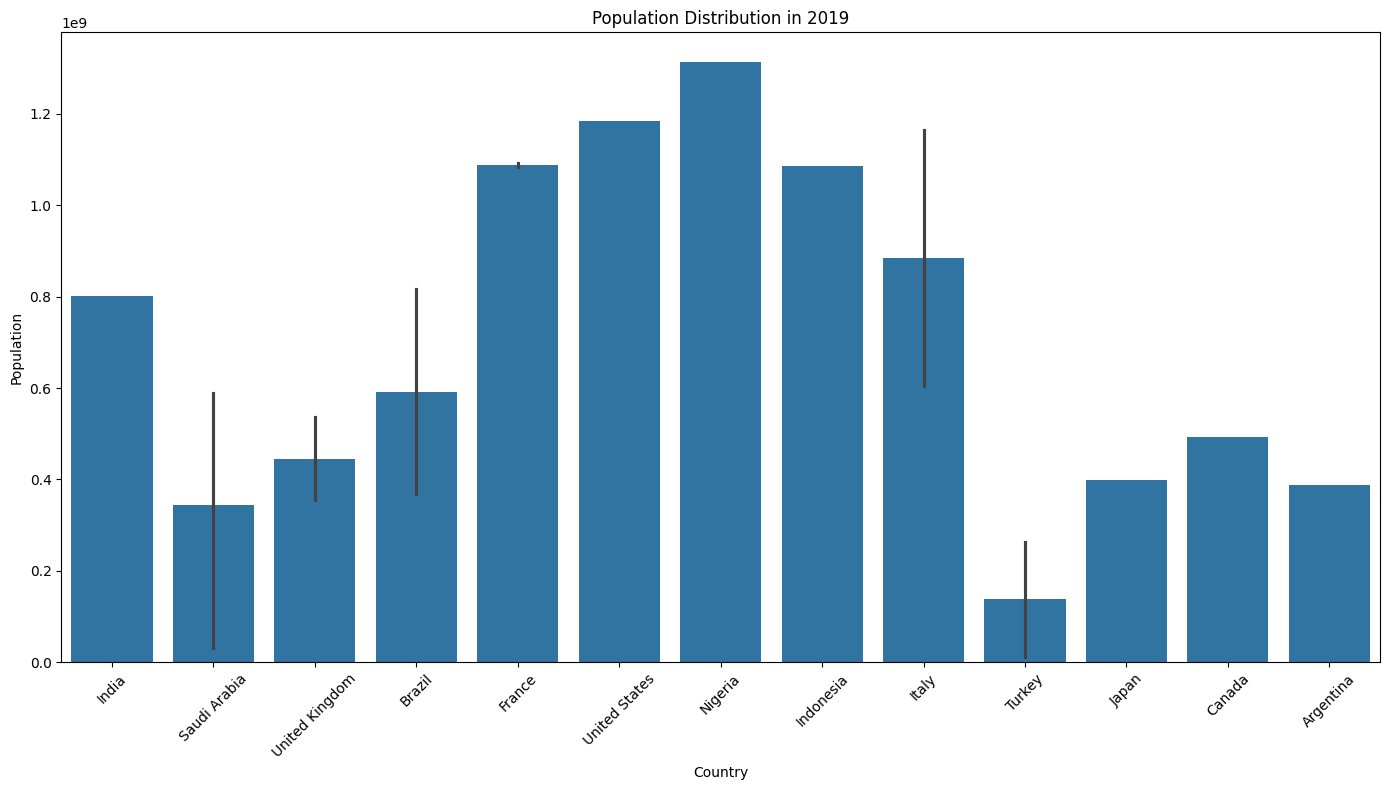

In [ ]:
#Distribucija stanovnistva
latest_year = df['Year'].max()
latest_population = df[df['Year'] == latest_year]
plt.figure(figsize=(14, 8))
sns.barplot(data=latest_population, x="Country", y="Population")
plt.title(f"Population Distribution in {latest_year}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

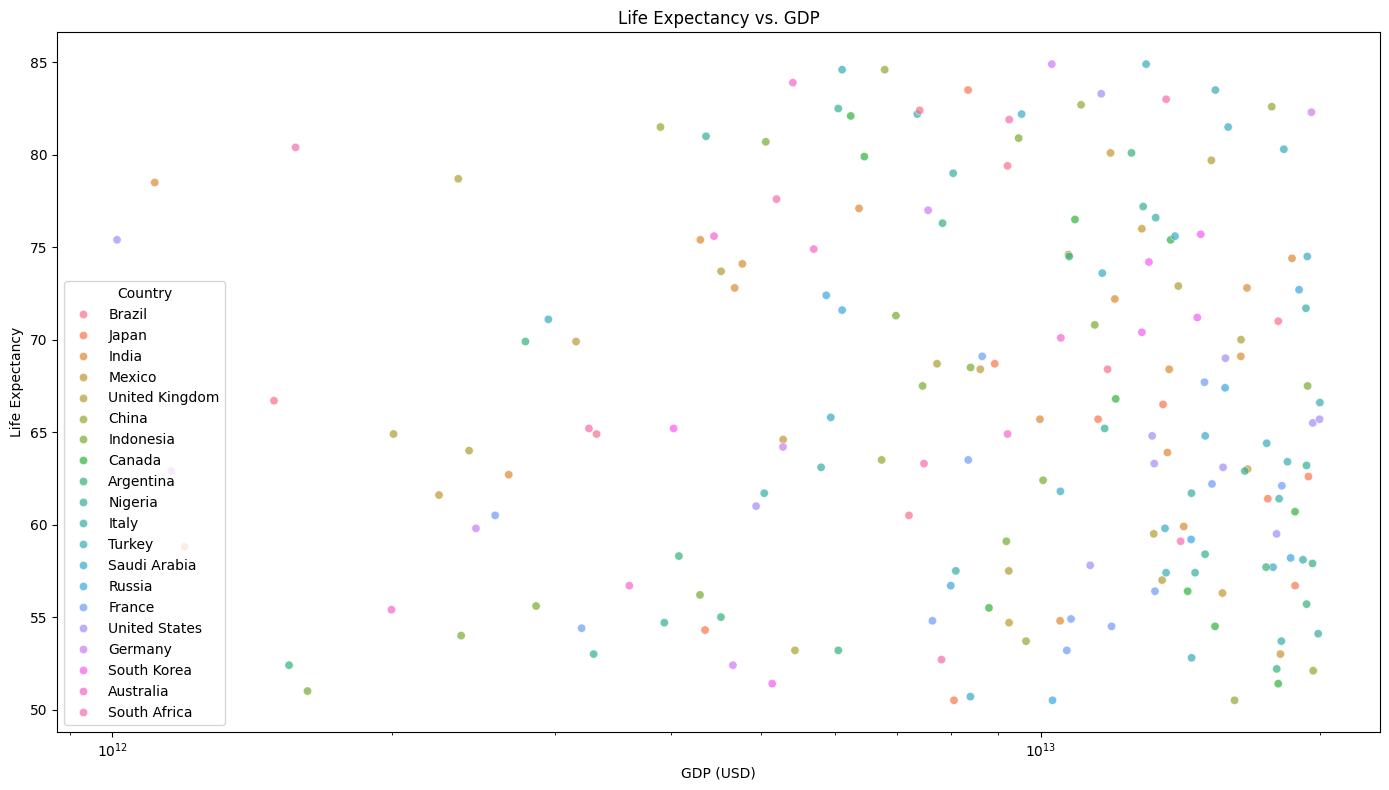

In [ ]:
#Ocekivani zivotni vek vs. BDP
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="GDP (USD)", y="Life Expectancy", hue="Country", alpha=0.7)
plt.title("Life Expectancy vs. GDP")
plt.xscale("log")
plt.tight_layout()
plt.show()

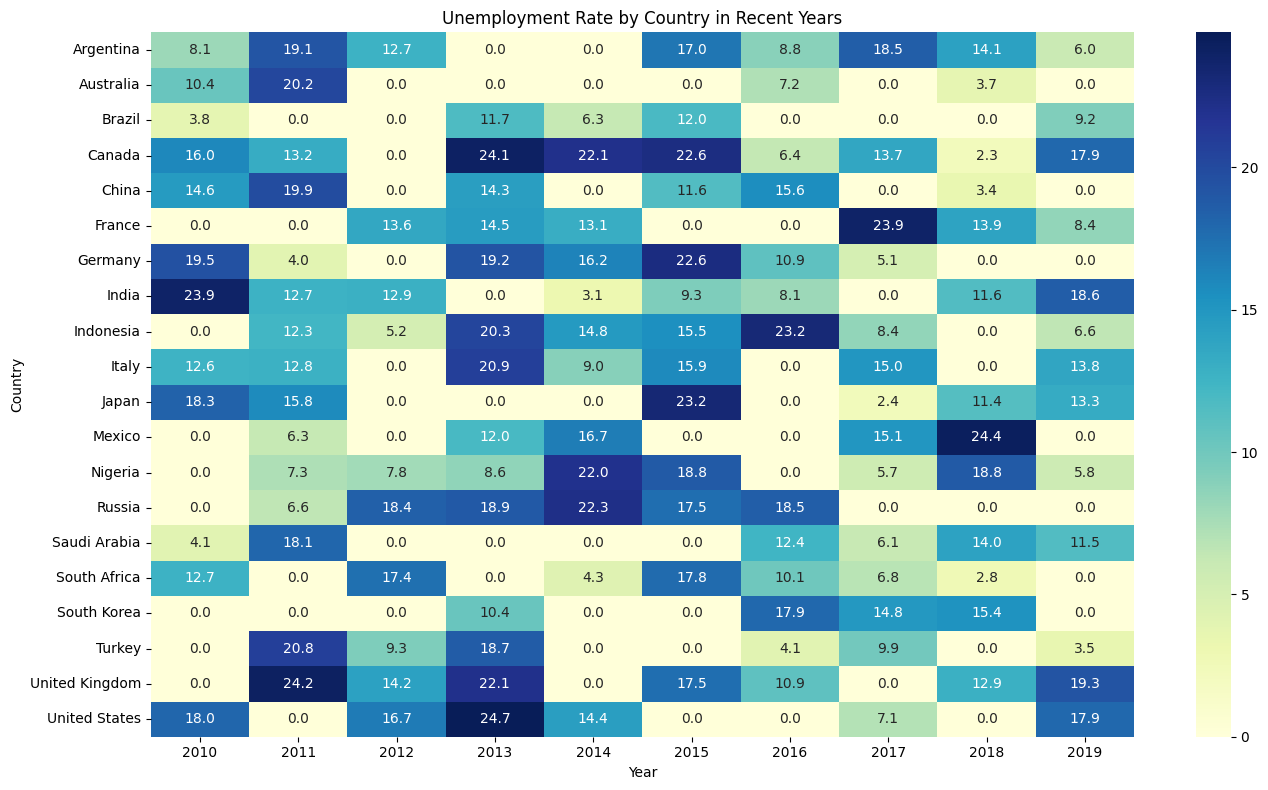

In [ ]:
#Broj nezaposlenih po drzavama
df_aggregated = df.groupby(['Country', 'Year'], as_index=False).agg({'Unemployment Rate (%)': 'mean'})

unemployment_latest = df_aggregated.pivot(index="Country", columns="Year", values="Unemployment Rate (%)").fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(unemployment_latest, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Unemployment Rate by Country in Recent Years")
plt.tight_layout()
plt.show()

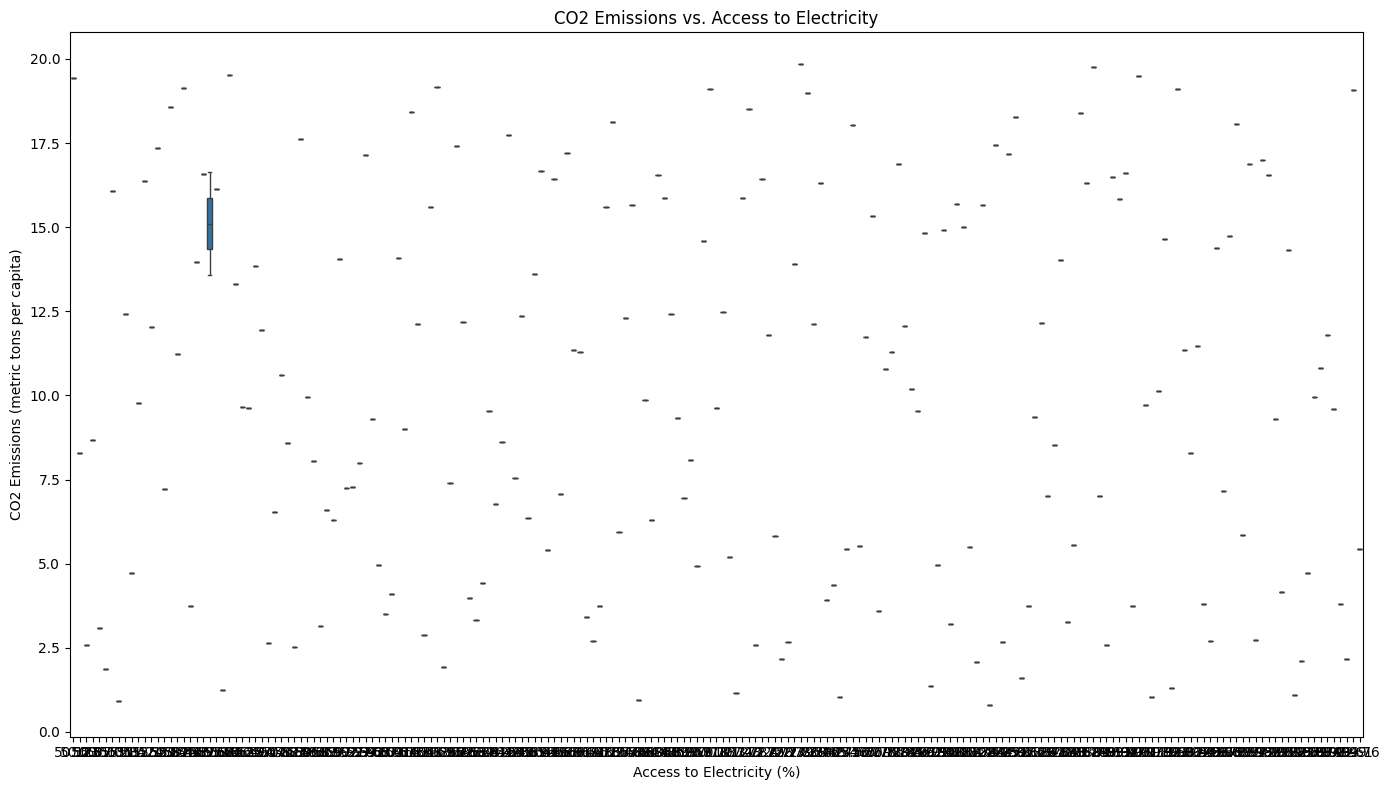

In [ ]:
#Emisije CO2 i pristup elektricnoj energiji
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Access to Electricity (%)", y="CO2 Emissions (metric tons per capita)")
plt.title("CO2 Emissions vs. Access to Electricity")
plt.tight_layout()
plt.show()

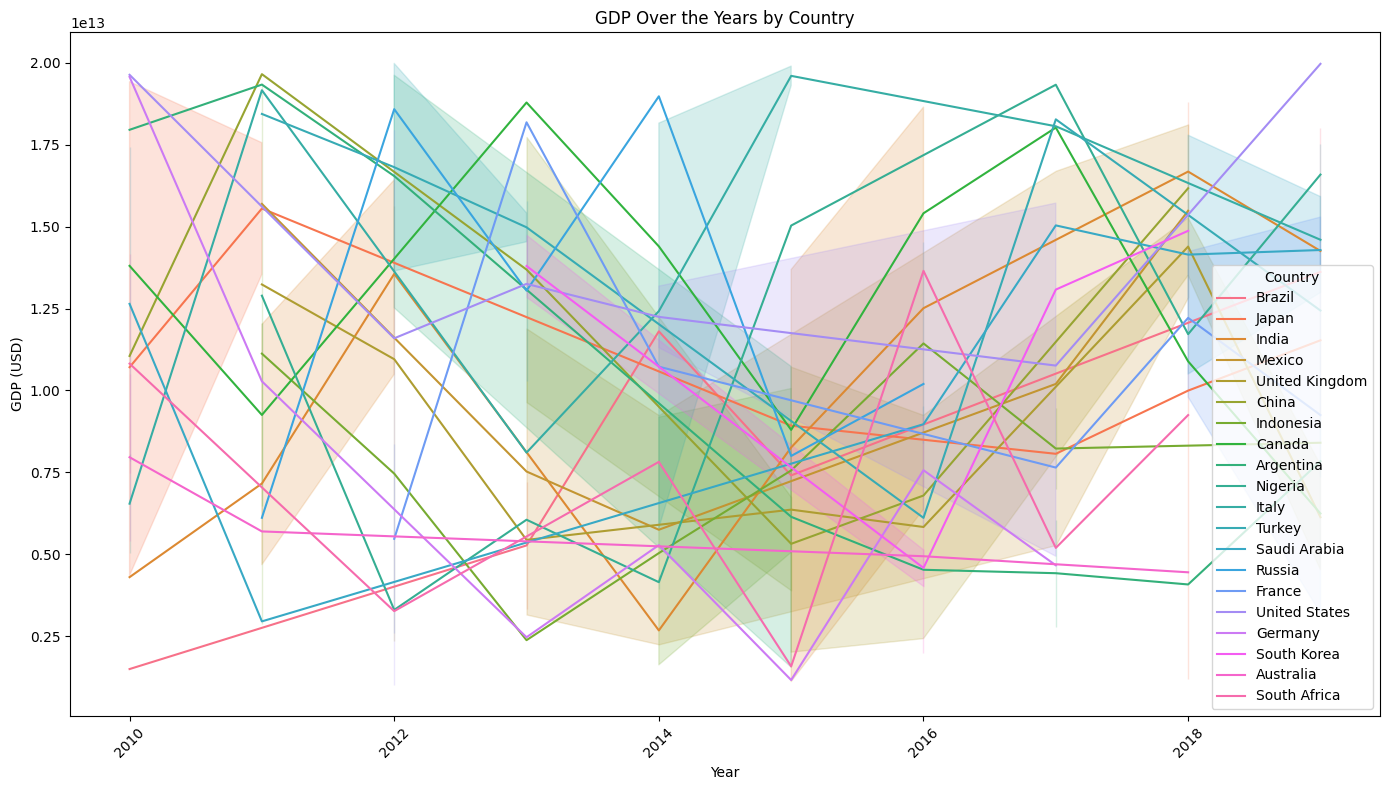

In [ ]:
#Bruto domaci proizvodi(BDP) po godinama za sve drzave
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x="Year", y="GDP (USD)", hue="Country")
plt.title("GDP Over the Years by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()